In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
# Load the datasets
X_train = pd.read_csv("C:/Users/Anorm/OneDrive/Documents/balanciumrx/X_train_di.csv")
X_test = pd.read_csv("C:/Users/Anorm/OneDrive/Documents/balanciumrx/X_test_di.csv")
y_train = pd.read_csv("C:/Users/Anorm/OneDrive/Documents/balanciumrx/y_train_di.csv")
y_test = pd.read_csv("C:/Users/Anorm/OneDrive/Documents/balanciumrx/y_test_di.csv")

In [26]:
# Display shapes of the datasets to confirm loading
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")



Shapes:
X_train: (26927, 36)
X_test: (6732, 36)
y_train: (26927, 1)
y_test: (6732, 1)


In [3]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
y_train.head()

,Level
0,1
1,1
2,1
3,0
4,1


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8858

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.48      0.62       502
           1       0.89      0.98      0.93      5434
           2       0.80      0.53      0.63       796

    accuracy                           0.89      6732
   macro avg       0.85      0.66      0.73      6732
weighted avg       0.88      0.89      0.87      6732



In [6]:
# Apply SMOTE with specified sampling strategy
smote = SMOTE(sampling_strategy={0: 21411, 1: 21411, 2: 21411}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)



In [31]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on resampled data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8843

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       502
           1       0.93      0.94      0.93      5434
           2       0.69      0.66      0.67       796

    accuracy                           0.88      6732
   macro avg       0.78      0.76      0.77      6732
weighted avg       0.88      0.88      0.88      6732



c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80}
Accuracy: 0.8861

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       502
           1       0.93      0.94      0.93      5434
           2       0.69      0.66      0.68       796

    accuracy                           0.89      6732
   macro avg       0.78      0.75      0.77      6732
weighted avg       0.88      0.89      0.88      6732



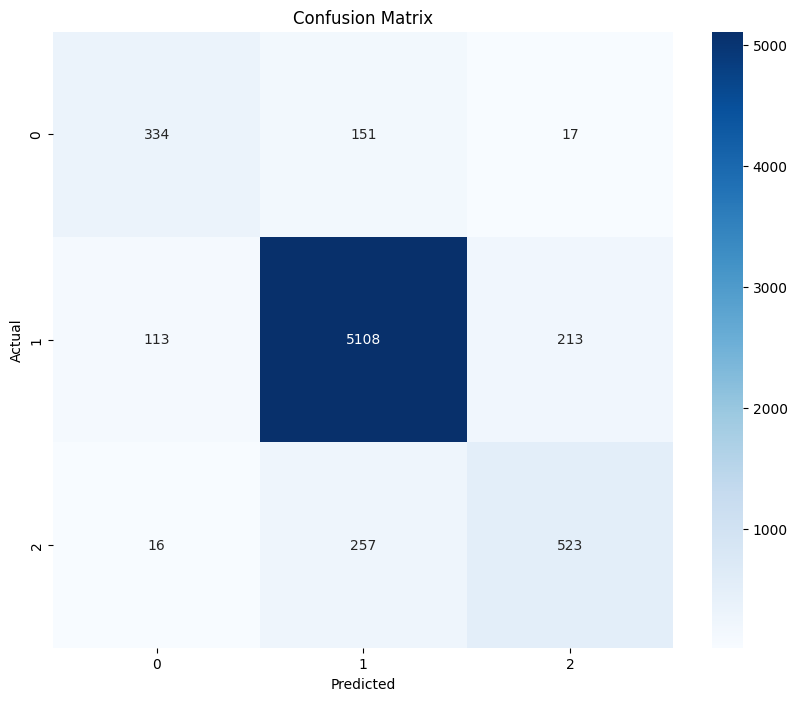

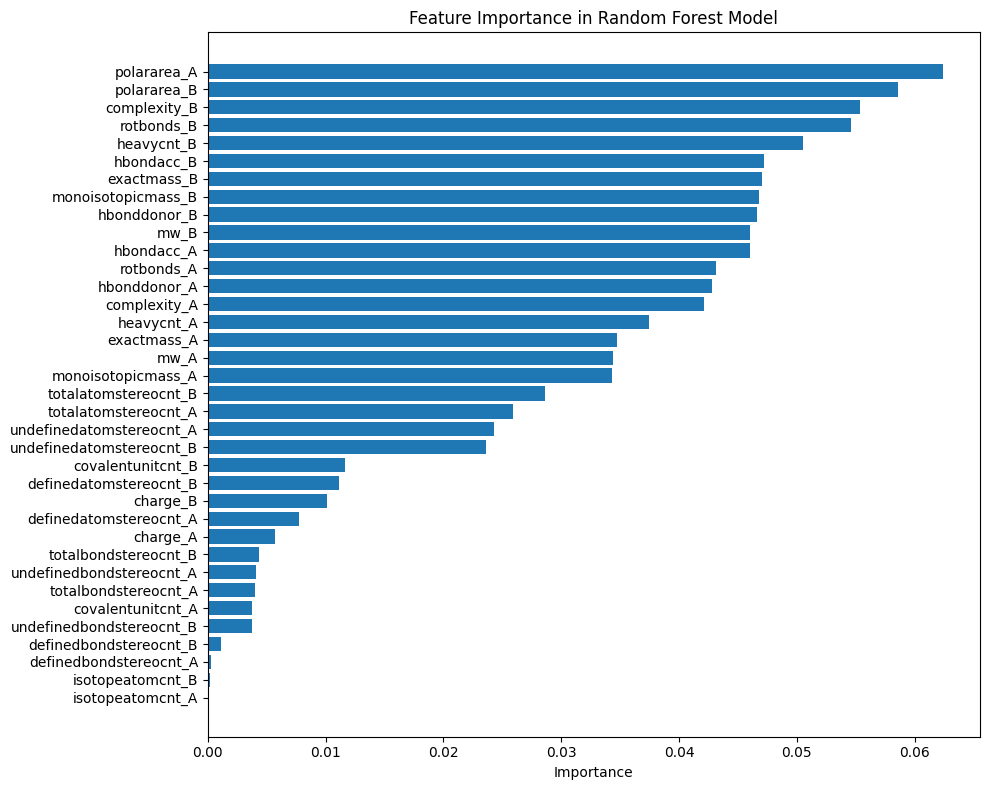

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [500],
    'max_depth': [80],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create a base Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_resampled, y_resampled)

# Print the best parameters
print("Best parameters:", random_search.best_params_)

# Get the best model
best_rf = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns  

# Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance)
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'n_estimators': 1000, 'learning_rate': 0.3}
Accuracy: 0.9011

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       502
           1       0.93      0.96      0.94      5434
           2       0.77      0.68      0.72       796

    accuracy                           0.90      6732
   macro avg       0.83      0.76      0.79      6732
weighted avg       0.90      0.90      0.90      6732



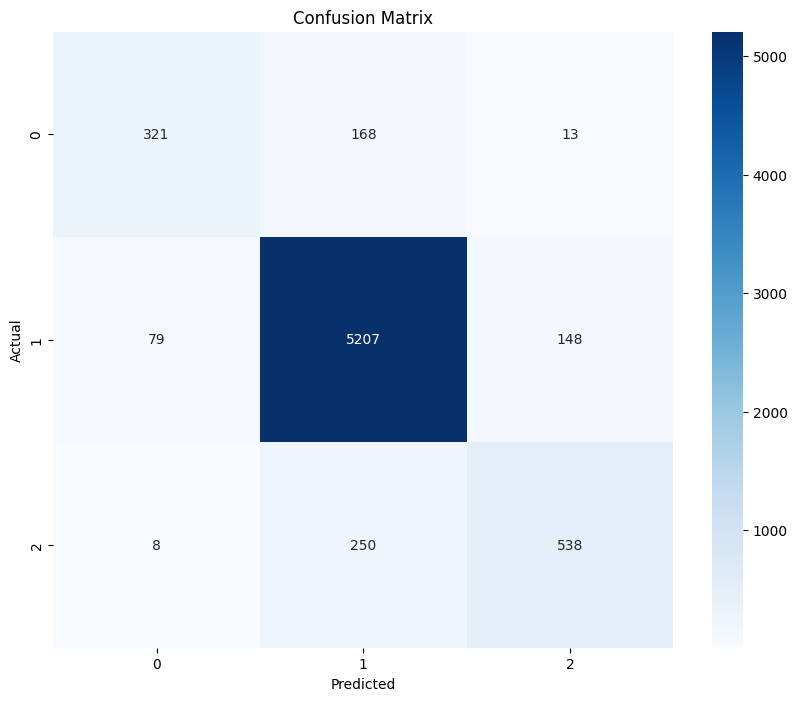

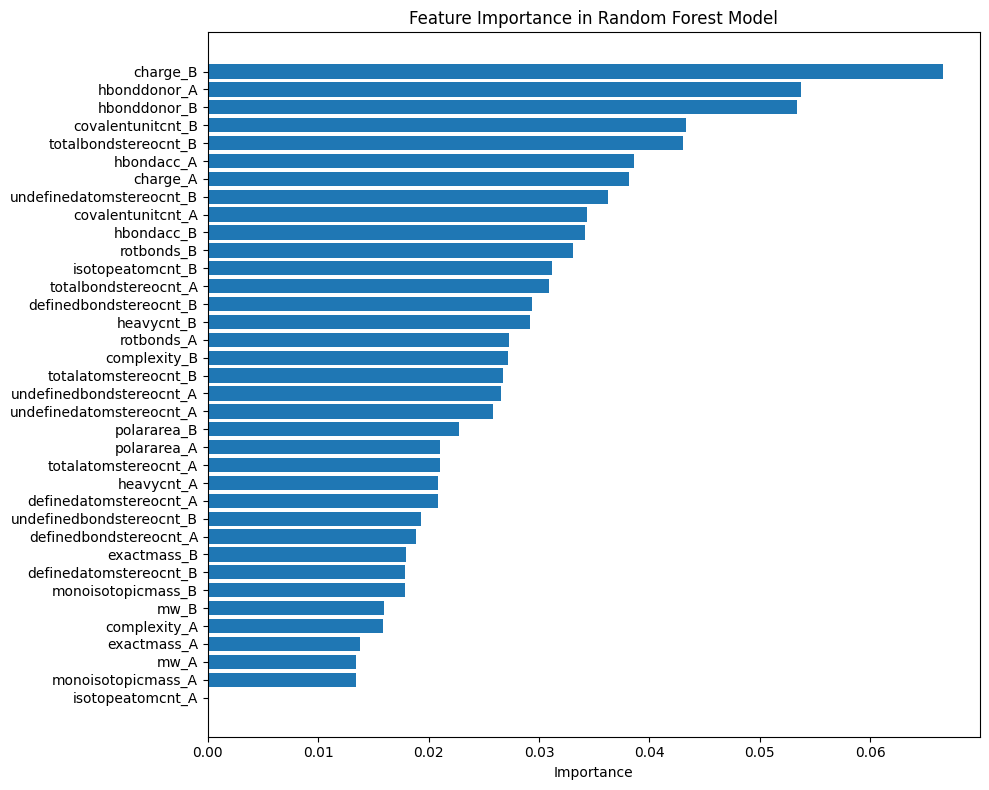

In [9]:
param_grid = {
    'learning_rate': [0.3],
    'n_estimators': [1000],
}

# Create a base XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_resampled, y_resampled)

# Print the best parameters
print("Best parameters:", random_search.best_params_)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_xgb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns  

# Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance)
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7770
[LightGBM] [Info] Number of data points in the train set: 64233, number of used features: 35
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.9058

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       502
           1       0.93      0.96      0.94      5434
           2       0.78      0.69      0.73       796

    accuracy                           0.91      6732
   macro avg       0.84      0.76      0.80      6732
weighted avg       0.90      0.91      0.90      6732



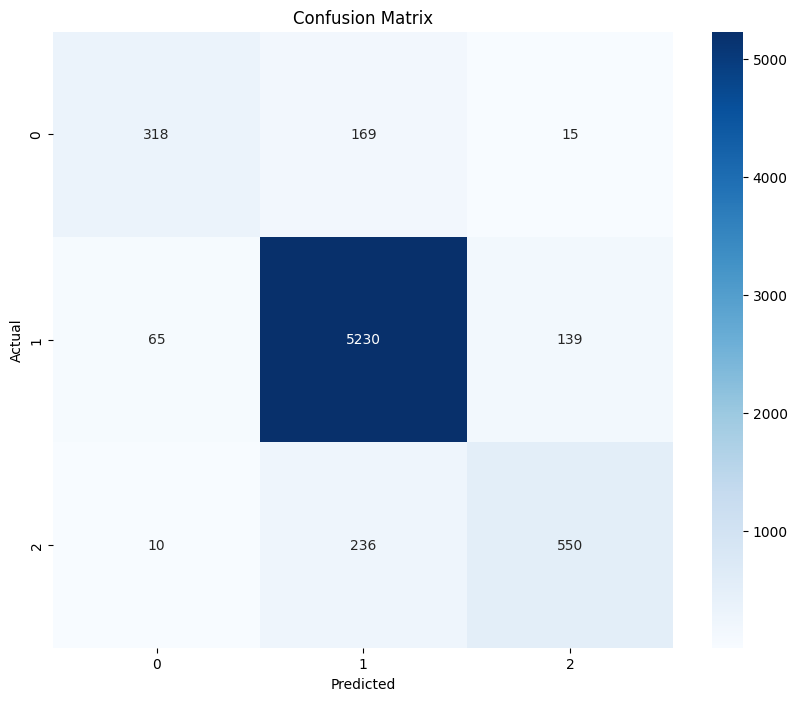

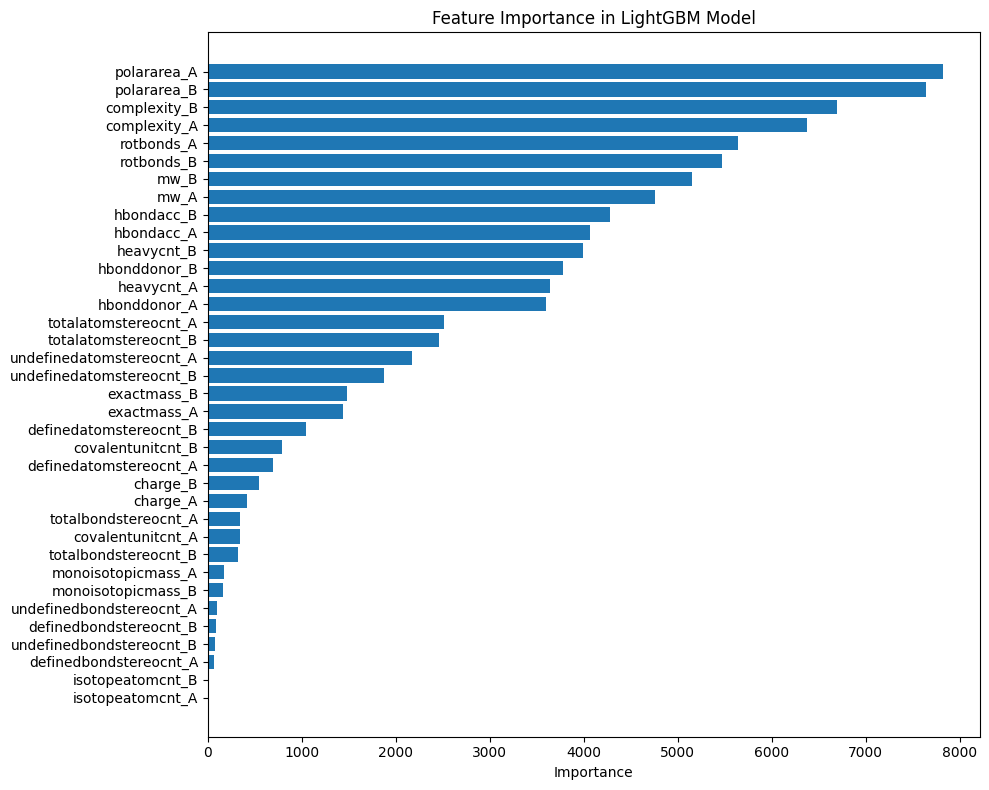

In [23]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create a LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(learning_rate=0.3, n_estimators=1000, random_state=42)

# Fit the model
lgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = lgb_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = lgb_classifier.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance)
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.title('Feature Importance in LightGBM Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()